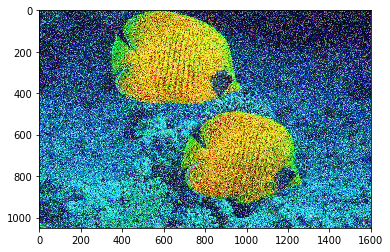

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('datasets/images/fish.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

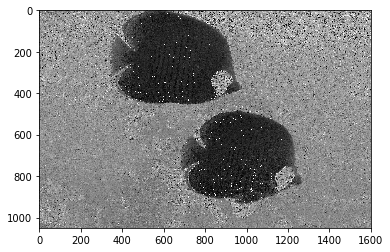

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
plt.imshow(h, cmap="gray")
plt.show()

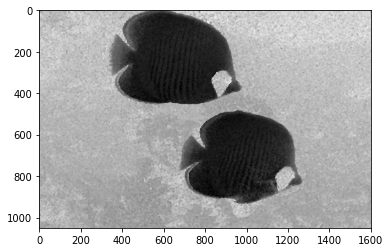

In [4]:
hm = cv2.medianBlur(h, 9)
plt.imshow(hm, cmap="gray")
plt.show()

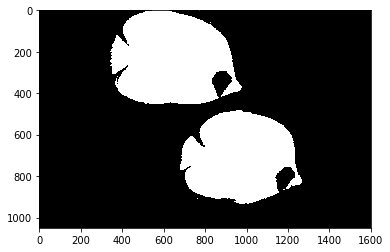

In [5]:
mask = cv2.inRange(hm, 0, 80)
plt.imshow(mask, cmap="gray")
plt.show()

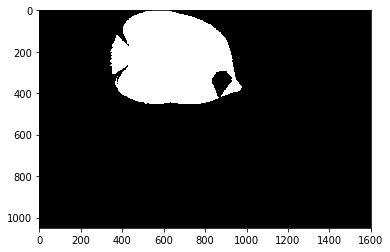

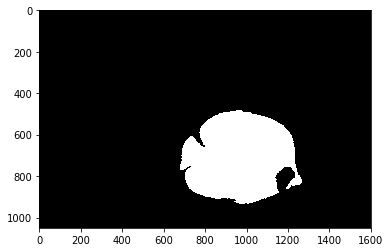

In [7]:
n, components = cv2.connectedComponents(mask, connectivity=8)
image_area = mask.shape[0] * mask.shape[1]
fishes = []
for c in range(n):
    fish = cv2.inRange(components, c, c)
    fish_area = np.count_nonzero(fish)
    if 0.1 < (fish_area / image_area) < 0.5:
        bb = cv2.boundingRect(fish)
        fishes.append(fish)
        plt.imshow(fish, cmap='gray')
        plt.show()

Fish center of mass:  (636.043670278681, 237.33936008646472)


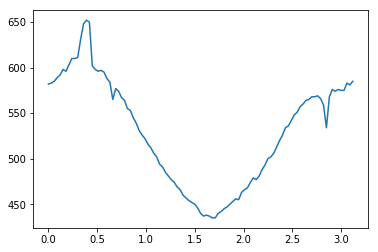

Tilt angle: 0.39
(975, 376) (372, 128) Len = 652.006901803961


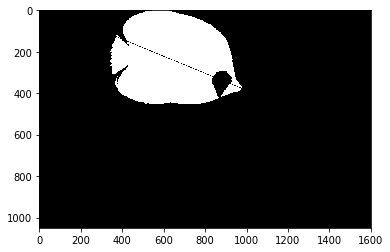

Fish center of mass:  (963.2677256302387, 710.2158070976698)


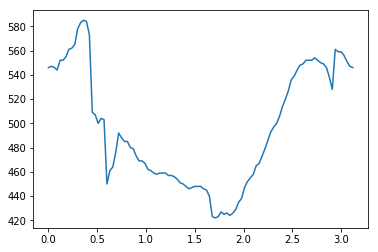

Tilt angle: 0.36
(1267, 824) (719, 618) Len = 585.4400054659743


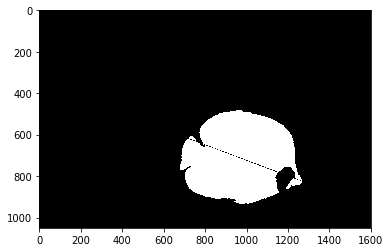

In [8]:
import math, operator
for fish in fishes:
    # compute center of mass
    X, Y, C = 0, 0, 0
    for x in range(fish.shape[1]):
        for y in range(fish.shape[0]):
            if fish[y,x]:
                X += x
                Y += y
                C += 1
    X /= C
    Y /= C
    print("Fish center of mass: ", (X, Y))
    M = max(*fish.shape)
    
    angles = {}
    for a in range(0, 314, 3):
        alpha = a / 100
        c_neg, c_pos = 0, 0
        for d in range(-M, M+1):
            x, y = int(X + d * math.cos(alpha)), int(Y + d * math.sin(alpha))
            if 0 <= x < fish.shape[1] and 0 <= y < fish.shape[0] and fish[y,x]: 
                if d < 0:
                    c_neg = max(-d, c_neg)
                else:
                    c_pos = d
        angles[alpha] = c_neg + c_pos
    plt.plot(angles.keys(), angles.values())
    plt.show()
    max_angle = max(angles.items(), key=operator.itemgetter(1))[0]
    print("Tilt angle:", max_angle)
    far1, far2 = (X, Y), (X, Y)
    for d in range(0, M):
        x, y = int(X + d * math.cos(max_angle)), int(Y + d * math.sin(max_angle))
        if 0 <= x < fish.shape[1] and 0 <= y < fish.shape[0] and fish[y,x]:
            far1 = (x, y)
        x, y = int(X - d * math.cos(max_angle)), int(Y - d * math.sin(max_angle))
        if 0 <= x < fish.shape[1] and 0 <= y < fish.shape[0] and fish[y,x]:
            far2 = (x, y)
    print(far1, far2, "Len =", ((far1[0] - far2[0])**2 + (far1[1] - far2[1])**2)**0.5)
    cv2.line(fish, far1, far2, 0.5, 2)
    plt.imshow(fish, cmap="gray", vmin=0, vmax=2)
    plt.show()